# Why Sequence Models ?
- In speech recognition we are given an input audio clip X and asked to map it to a text transcript Y. Both the input and the output here are sequence data, because X is an audio clipd and so that plays out over time and Y, the output is a sequence of words.
- In Music generation, only the output Y is a sequence, the input can be the empty set or it can be a single integer.
- Sentimeent classification the nput X is a sequence, so given the input phrase like 'There is nothing to like in the movie' how many stars do we think this review wil be?
- All of these problems can be addressed as supervised learning with label data X, Y as the training set
- 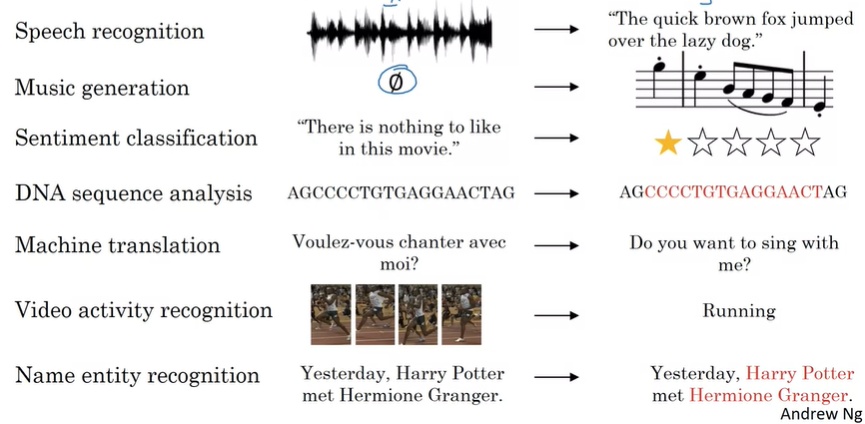

# Notation
- Let's say we want to build a sequence model for name-entity recognition
    x : Harry Potter and Hermione Granger invented a new spell.
    Y : y has outputs per input word and the target output the design y tells us for each of the input words is that part of a person's name.
        -  1 1 0 1 1 0 0 0 0 
    T_x : The length of a sequence then different examples in our training set can have different lengths. 
    T_x_i : Input length for training example i
## Representing words
- How we would represent individual words in a sentence.
- To represent a word in the setence the 1st thing we do is come up with a vocabulary called a Dictionary and that means making a list of the words that we will use in our representations.
- If we chosen a dictionary of 10,000 words and one way to build this dictionary will be to look through our training sets and find the top 10,000 ocurring words, also look through some of the online dictionaries that tells us what are the most common 10,000 words in the English Lanuguage.
- What we can do is then use one hot representation to represent each of these words.
- The representation x_t for each of the values of t in a sentence will be a one-hot vector, one-hot becuase there's exactly one one is on and zero everywhere else.
- So the goal is given the representation X to learn a mapping using a sequence model to then target output y.
- What if we encounter a word that is not in our vocabulary? Then we create a new token or a new fake word called Unknown word.
- 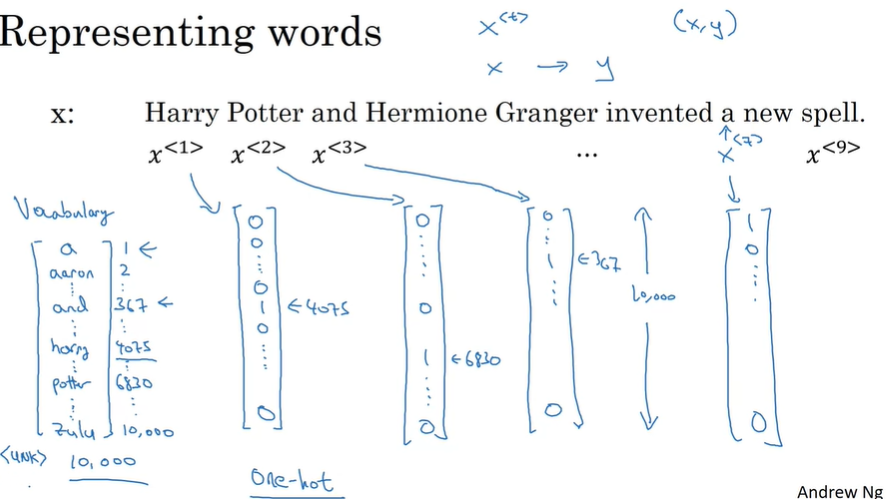

# Recurrent Neral Network Model
## Why not a standard network?
- One thing we could do is try to use a standard neural network for this task.
- We could imagine trying to take these 9 input words, maybe the 9 one-hot vectors and feeding them into a standard neural network, maybe a few hidden layers and then eventually had ths output the 9 values zero or one that tells us whether each word is part of a person's name.
- This turns out not to work well and there are 2 main problems of this : 
    1. The inputs and outputs can be different lengths and different examples. So it's not as if every single example had the same input length Tx or the same upper length Ty. Maybe we could pad or zero-pad every inputs up to that maximum length but this still doesn't seem like a good representation.
    2. A naive neural network architecture liks this, it doesn't share features learned across different positions of texts. 
- 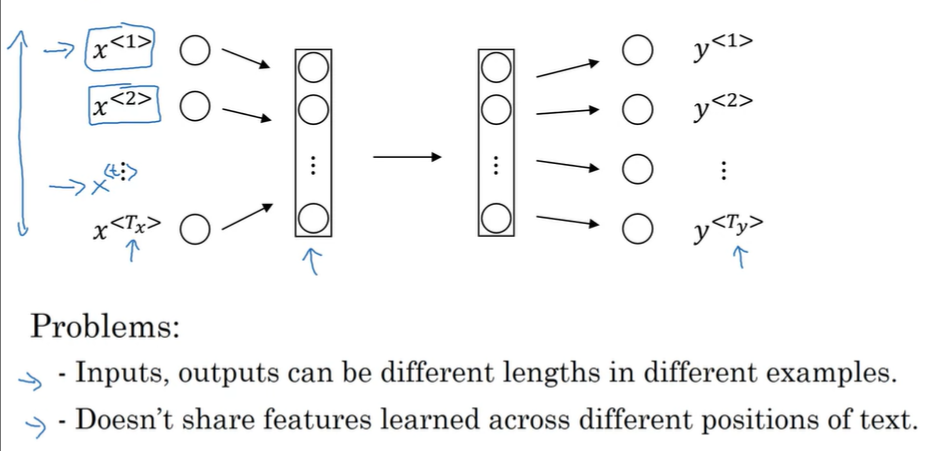

## Recurrent Neural Networks
- What we're going to do is take the 1st word and feed it into a neural network layer. So there's a hidden layer of the 1st neural network and we can have the neural network maybe try to predict the output. This part of the person's name or not.
- What a recurrent neural network does is, when it then goes on to read the 2nd word in the sentence x2, instead of just predicting y2 using only X2, it also gets to input some information from from the time step 1. So deactivation value from time step 1 is passed on to time step 2.
- Then at the next time step, recurrent neural network inputs the 3rd word X3 and it tries to output some prediction Y_hat3 and so on up until the last time step where it inputs x_Tx and then it outputs y_hat_Ty.
- So at each time step, the recurrent neural network that passes on as activation to the next time step for it to use.
- The recurrebt neural network scans through the data from left to right. The parameters it uses for each time step are shared. So there'll be a set of parameters governing the connection from X1 to hidden layer, will be some set of parameters, W_ax and is the samne parameters W_ax that it uses for every time step.
- Deactivations, the horizontal connections will be governed by some set of parameters W_aa and the parameters W_aa use one every timestep and similary the sum W_ya that governs the ouput predictions.
- So, in this recurrent neural network, when making the predictions for Y3, it gets the information not only from X3 but also the information from X1 and X2 becuase the information on X1 can pass through this way to help to prediction with Y3.
- One weakness of this RNN is that it only uses the information that is earlier in the sequence to make a prediction. In particular, when predicting y3, it doesn't use information about the words X4, X5, X6 and so on. We can address this in bi-directional recurrent neural networks of BRNNs.
- 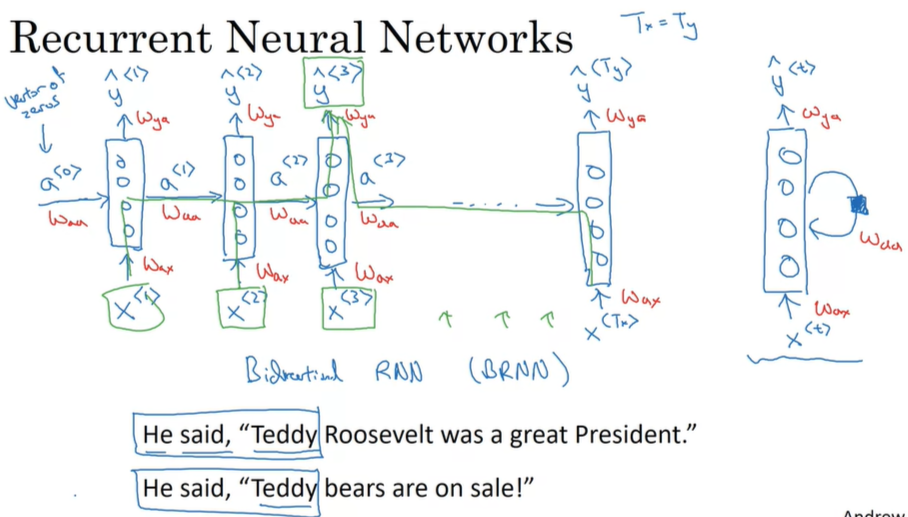

## Forward Propagation
- We start off with the input a_0 = vector of all zeros.
- The activation function using or to compute the activations will often be a tanh in the choice of an RNN and sometimes relu is also used.
- Depending on what our output y is, if it is a binary classification problem, then we would use a sigmoid activation function, or it could be a softmax that we have a k-way classification problem that the choice of activation function here will depend on what type of output y we have.
- 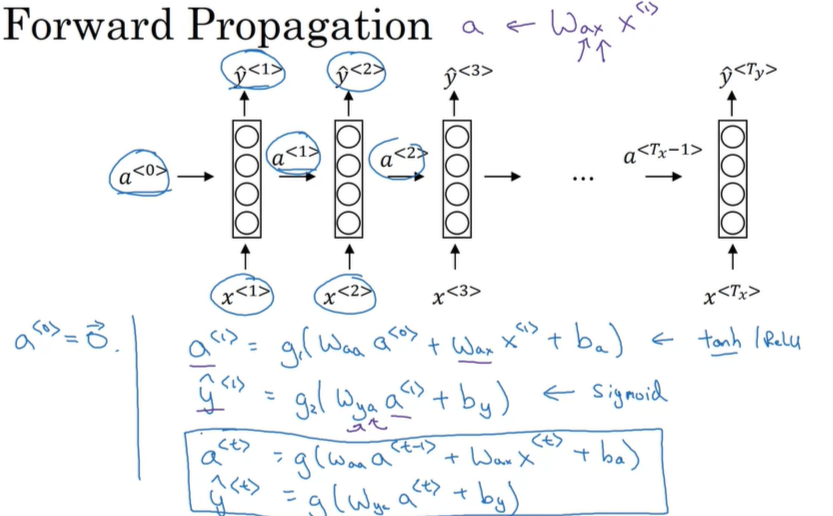

## Simplified RNN
- The advantage of the notation is that rather than carrying around 2 parameter matrices, Waa and Wax, we can compress them into just 1 parameter matrices Wa
- 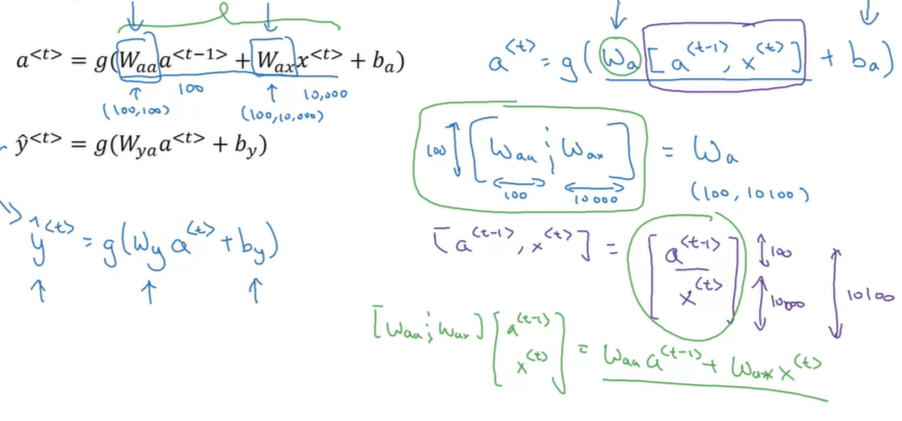

# Back Propagation through time
- 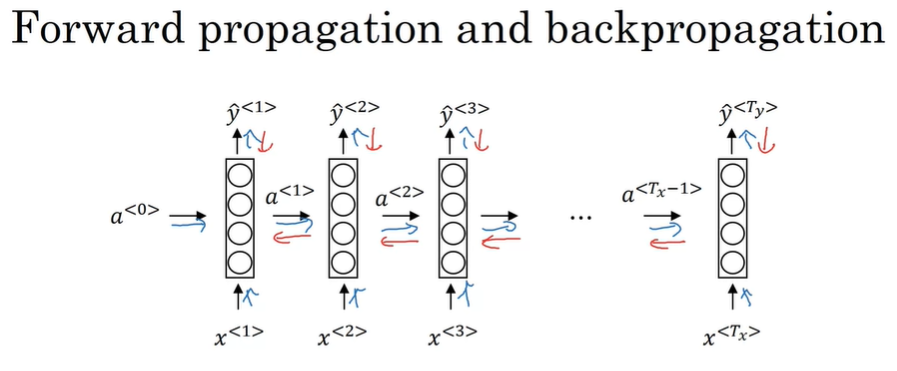
- In order to comptute backpropagation, we need a loss function. Se let's define an element-wise loss function, which is supposed for a certain word in the sequence. We use cross entropy loss which is the loss associated with a single prediction at a single position or at a single time set t for a single word.
- To compute the final loss L, which is the sum of the individual per timestep loss.
- In the back propagation procedure, the most significant recursive calculation is which goes from right to left which is backpropagation through time
- 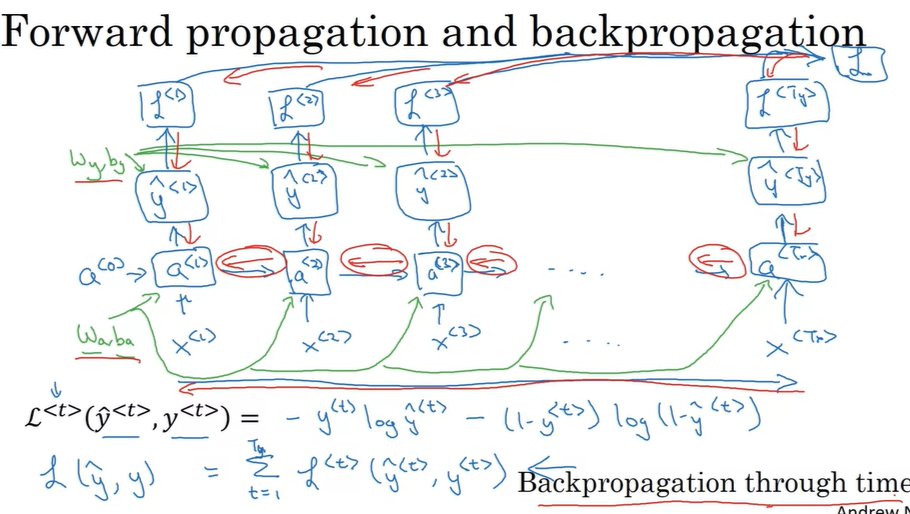

# Different types of RNNs
- It turns out that Tx and Ty may not always be the same.
- Rather than having to use an output at every single time-step, we can then just have the RNN read into entire setence and have it output y at the last time-step when it has already input the entire sentence. So this neural network would be a many-to-one architecture. Because as many inputs, it inputs many words and then it just outputs one number.
- 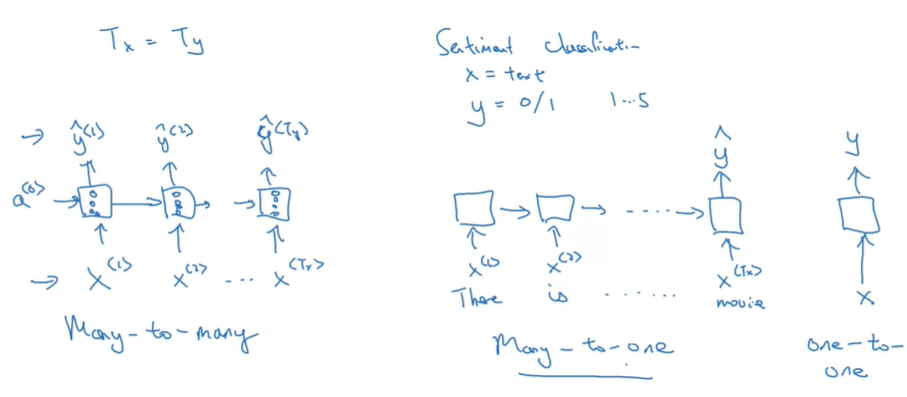
- An example of a one-to-many neural network architecture will be music generation.
- For that, the neural network architecture would be our input X, then have our RNN output. The 1st value and then have that with no further inputs output. The second value and then go on to output.
- A example of many-to-many is machine transaltion from one language to another language.
- In many-to-many, first reading the setence, reading the input that we want to translate to english. Having done, we then have the neural network output the translation. 
- 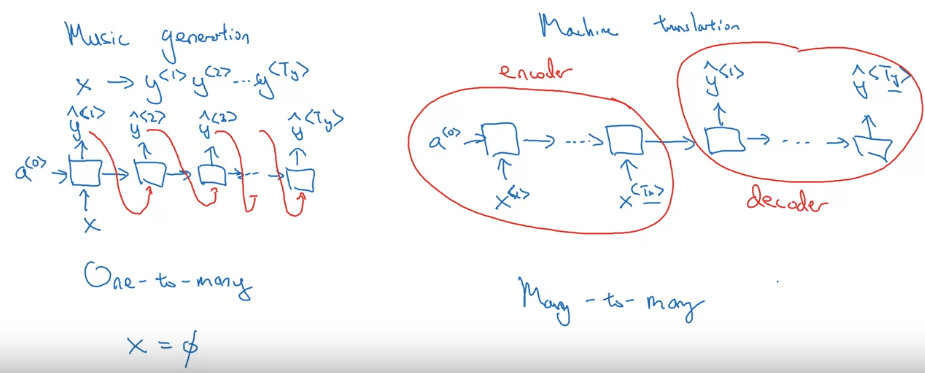
- 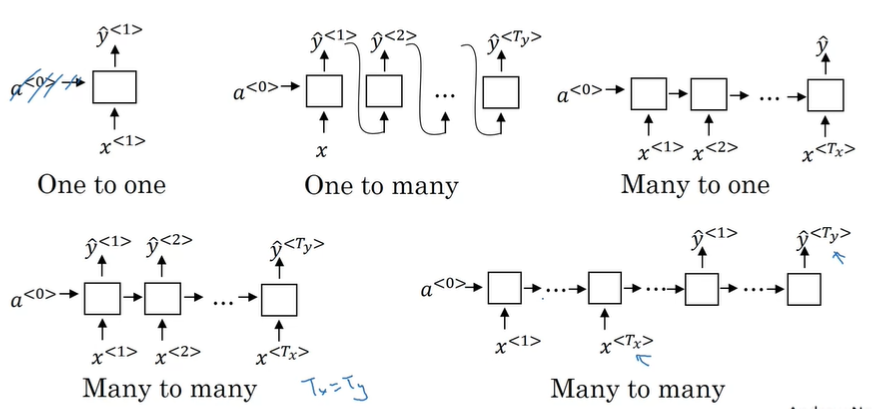

# Language Model and Sequence Generation
- Lanuguage modeling is one of the most basic and important task in natural language processing.
## What is language modelling?
- Let's say we're building a speech recognition system and we hear the sentecne. What did we just hear is 'The apple and pair salad' or 'The apple and pear salad'. The 2nd sentence is much more likely, that's what a good speech recognition system would output, even though these 2 sentences sound exactly the same. 
- The way a speech recognition system picks the 2nd sentence is by using a language model which tells it what is the probability of either of these 2 sentences.  
- A language model does, given any sentence, its job is to tell us what is the probability of that particular sentence.
- The basic job of a language model is to input the sentence, y^1, y^2,..y^t and for language model, it'll be useful to represent the setences as output y rather than as input x, a language model then estimates the probability of that particular sequence of words.

## Language modelling with an RNN
- To build a language model using a RNN, we will 1st need a training set comprising a large corpus of English text or text from whatever language we want to build a language model of.
- Let's say we get a sentnece in our training set as follows, 
    - 'cats average 15 hours of sleep a day.' 
    - The 1st thing we would do is tokenize the sentence, and that means we would form a vocabulary. and then map each of these words to one-hot vectors or to indices in our vocabulary.
- One thing we might also want to do is model when sentences end. So another common thing to do is add an extra token called EOS. This can help us figure out when a sentence ends. The EOS token can be appended to the end of every sentence in our training set if we want our model to explicitly capture when sentences end.
- What if some of the words in our training set are not in our vocabular, then we could take that word and replace it with a unique token called UNK (Unknown words) and we just model the chance of the unknown word instead of the specific word.
- Having carried our the tokenization step, which basically means taking the input sentence and map here to the individual tokens or the individual words in our vocabulary. Next, let's build an RNN to model the chance of these different sequences.
- 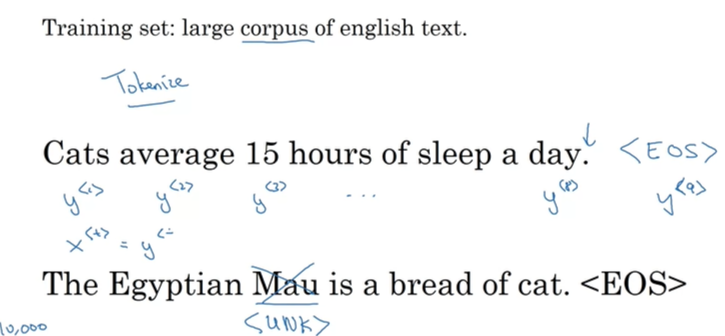

## RNN model
- Let's build the RNN model,
- At time zero, we're going to end up computing some activation a_1 as a function of some input x_1, and x_1 would be set to zero vector. The previous a_0 by convention, also set that to vector zeros. a_1 does a softmax prediction to try to figure out what is the probability of the 1st word y_1.
- The step has a softmax, so it's trying to predict what is the probability of any word in a dictionary. If we have 10,00 word vocabulary + unkndown word + EOF, then the softmax predicts the probability of every word so y is a vector of 10,002 .
- Thent the RNN steps forward to the next step and has some activation a_2 in the next step. At this step, it's job is to try to fugure out what is the 2nd word. But now we will also give it the correct 1st word.
- Then we go on to the next step of the RNN where we now compute a_3. But to predict what is the 3rd word which is 15, we can now give it the 1st 2 words i.e Cats average. So its job is figure out what is the next word in the sequence.
- So, each step in the RNN will look at some set of preceding words such as, given the 1st 3 words, what is the distribution over the next word? This RNN learns to predict one word at a time going from left to right. 
- Next, to traing this through a network, we're going to define the cost function. At certain time t, if the true word was y_t and our network softmax predicted some y_hat_t, then we use cross entropy softmax loss function and then the overall loss is just the sum over all time steps of the losses associated with the individual predictions.
- If we train this RNN on a large training set, what it will be able to do is, it can predict what is the chance of the next word.
- 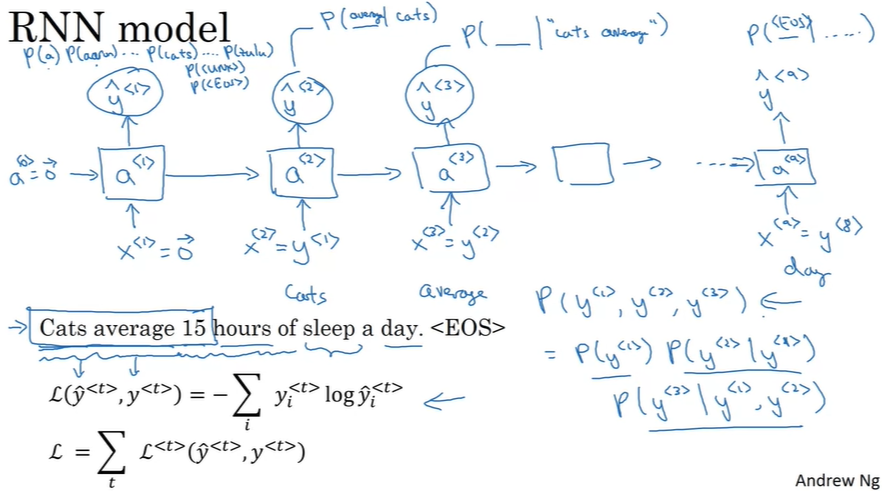

# Sampling Novel Sequences
- After we train a sequence model, one of the ways we can informally get a sense of what is learned is to have a sample novel sequences.
## Sampling a Sequence from a training RNN
- 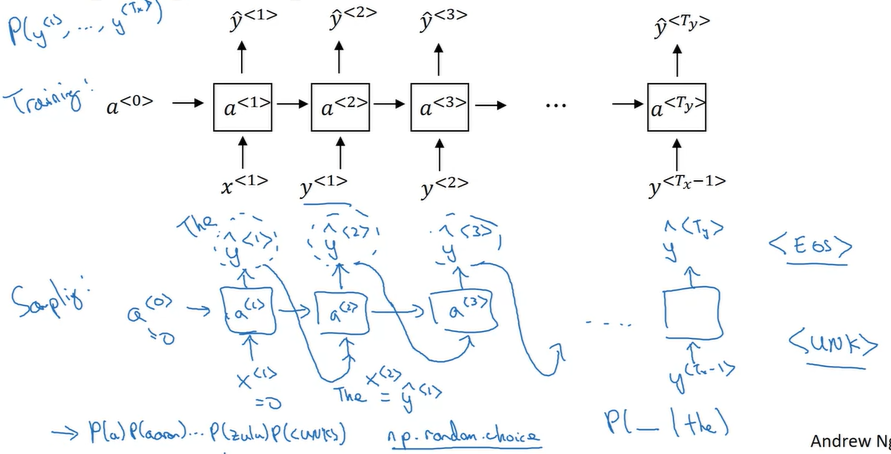
- 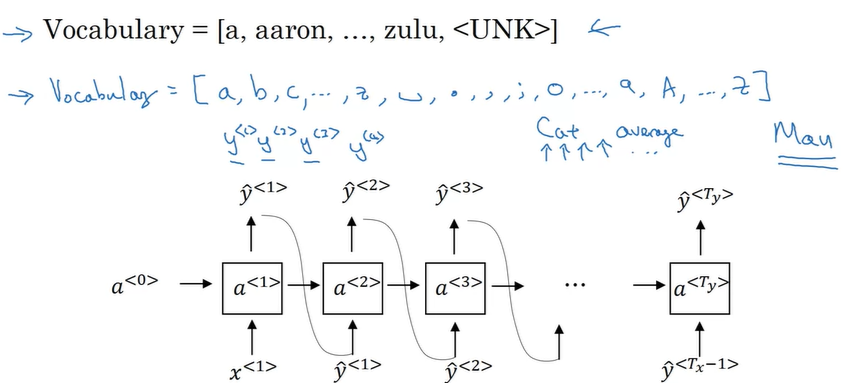

# Vanishing Gradients with RNNs
- It turns out that one of the problems of the basic RNN algorithm is that it runs into vanishing gradient problems.
- A very deep neural network, then the gradient from the output y would have a very hard time propagation back to affect the weights of the earlier layers, to affect the computations of the earlier layers.
- For an RNN with a similar problem, we have forward propagation from left to right and then backprop going from right to left. It can be quite difficult because of the same vanishing gradients problem for the outputs of the errors associated with the later timesteps to affect the computations that are earlier.
- Because of this problem, the basic RNN model has many local influences, meaning that the output y_hat is mainly influenced by inputs that are somewhat close. It's difficult for the output here to be strongly influenced by an input that was very early in the sequence. 
- Exploding gradients is also a problem in deep neural networks, where doing backprop, the gradiens should not just decrease exponentially they may also increase exponentially with the number of layers we go through.
- when exploding gradients happens the exponentially large gradient can cause our prameters get really messed up.
- It turns out that exploding gradients are easier to spot becuase the parametes has just blow up. We might often see NaNs, not a number, meaning results of a numerica overflow in our neural network computation.
- If we do see exploding gradients, one solution to that is apply gradients clipping. Look at our gradient vectors, and if it is bigger than some threshold, re-scale some of our gradient vectors so that it's not too big, so that is clipped according to some maximum value. 
- 
- A Grater Recurrent units (GRU) which is very effective solution for addressing the vanishing gradient problem and will allow our neural network to capture much longer range depedencies.

# Gated Recurrent Unit (GRU)
- The Gated Recurrent Unit, which has a modification to the RNN hidden layer that makes it much better at capturing long-range connections and helps a lot with the vanishing gradient problems.
- 
- We read the sentence from left to right, the GRU unit is going to have a new variable called C, which stands for Cell (memory cell). This memory cell will provide a bit of memory.
- At time t, the memory cell will have some value c_t. The GRU unitl will actually output an activation value a_t that's equal to c_t.
- At every time step, we're going to consider an overwriting the memory cell with a value c~_t (c tilde)
- The important idea of the GRU is we'll have a gate, represented by gamma_u, u stands for update gate. This would be a value b/w 0 and 1. So the sigmoid funtion is applied.
- The key part of the GRU is we're going to update C using c~ and then the gate will decide whether or not we actually update it. 
- If the gate = 0, don't upate it.
- What the element-wise multiplications do is it just tells us GRU which are the dimensions of our memory cell vector to update at every time step. We can choose to keep some bits constant while updating other bits. For example, maybe we'll use one-bit to remember the singular or plural cat, and maybe we'll use some other bits to realize that we're talking about food.
- 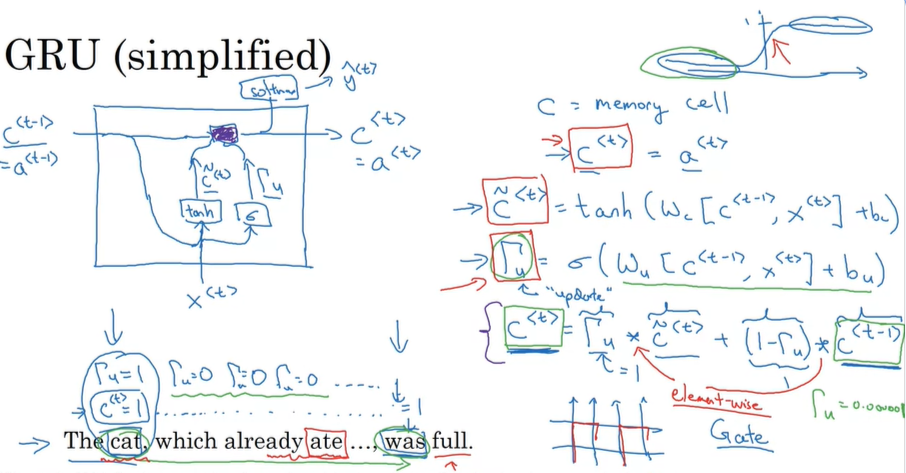

## Full GRU
- Another gate Gamma_r standing for relevance. This gamma_r tells us how relevant is c^t-1 to computing the next candidate for c^t
- 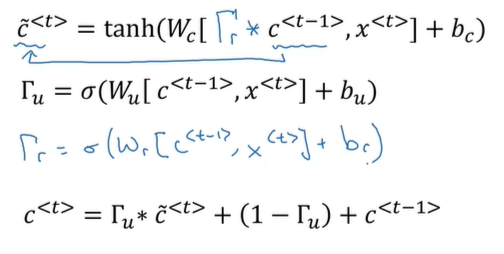

- Another common version is called Long, Short-term memory (LSTM)

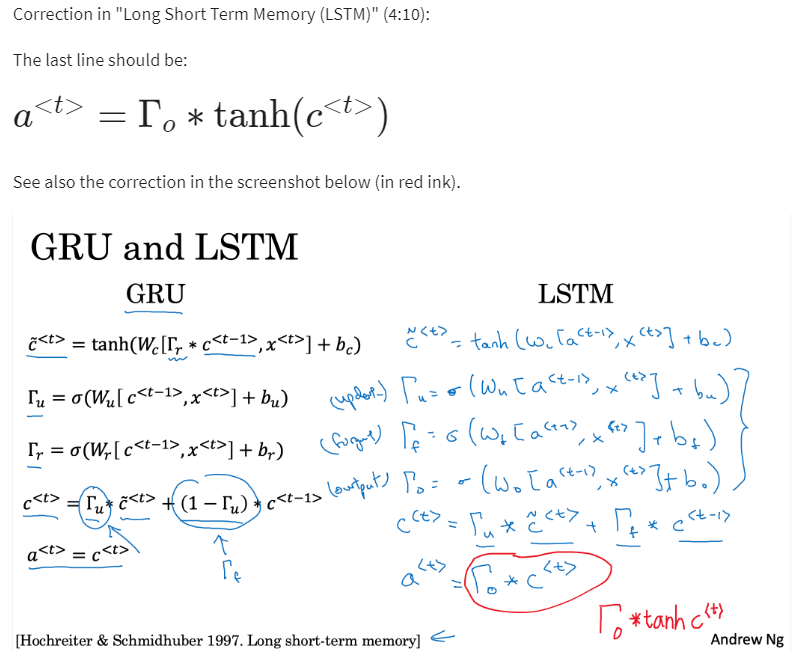

# Long Short Term Memory (LSTM)
- For GRU we had at=ct and 2 gates the update gate and the relevance gate. c(tilde)_t which is a candidate for replacing the memory cell. Then we use the gate, the update gate gamma Wu to decide whether or not to update c_t using c(tilde)_t.
- Here, we use update gate and forget gates to decide c^t. additionally gamma_output gate is also used.
- 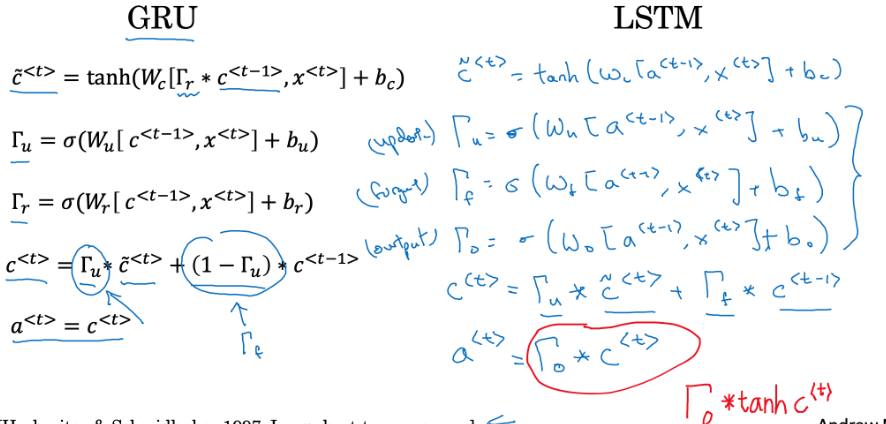
- 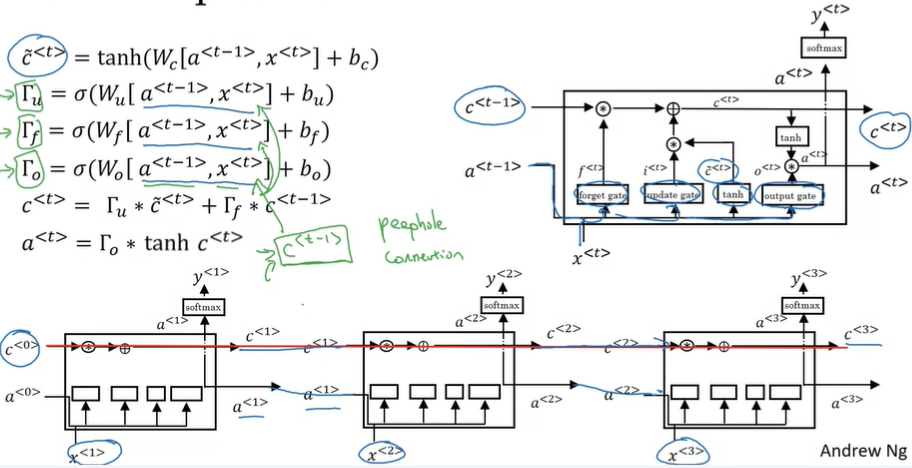

# Bidirectional RNN
- There are 2 more ideas that let us build much more powerful models. 
    1. Bidirectional RNN
    2. Deep RNN
- The bidirectional RNN, which lets us at the point in time to take information from both earliear and later in the sequence.
- 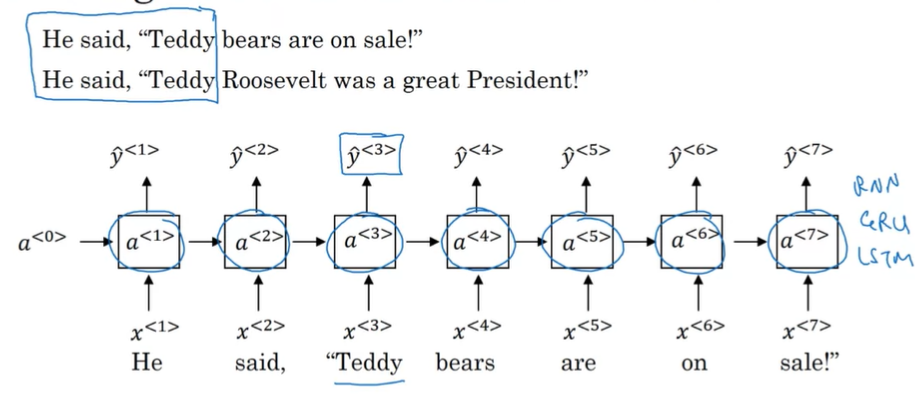
- A bidirection RNN works as follows : 
    - Lets use a simplified 4 input sentence, so we have 4 inputs X1, X2, X3 and X4. This network's hidden layer will have a forward recurrent components a1, a2, a3, and a4. This are connected forward.
    - Similarly we have backward recurrents which are connected backward time.
    - 
- For a lot of NLP problems, a bidirectional RNN with a LSTM appears to be commonly used.
- The disadvantage of the bidirectional RNN is that, we do need the entire sequence of data before we can make predictions anywhere.

# Deep RNNs
- a[l]<t> : Activation of layer l over time t.
- 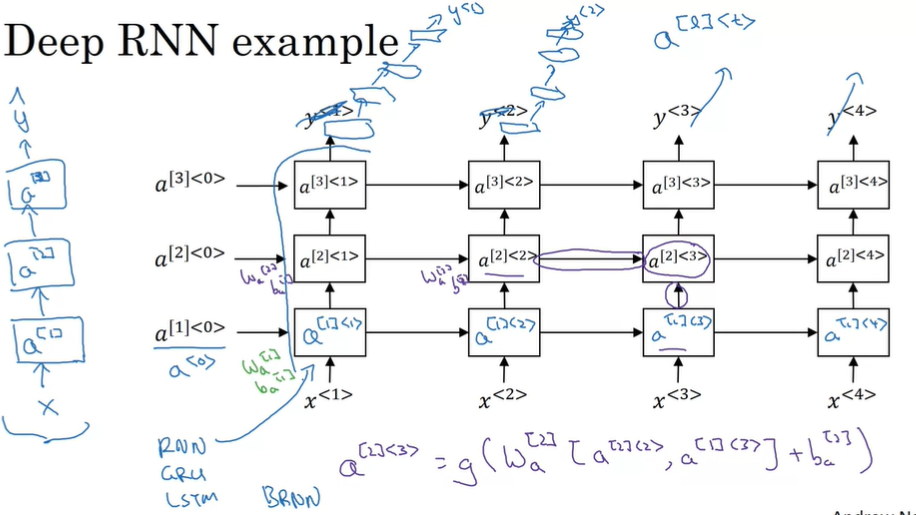